# 1) Delivery_time -> Predict delivery time using sorting time 


In [1]:
import pandas as pd

In [2]:
delivery=pd.read_csv("C:/Users/Admin/Downloads/delivery_time.csv")

In [3]:
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
delivery.shape

(21, 2)

In [6]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [7]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


We will visualize data using Seaborn 

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Visualize the relationship between features and the response using scatterplots

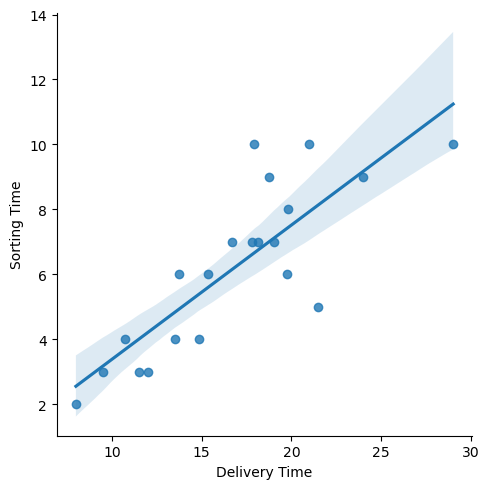

In [9]:
sns.lmplot(x="Delivery Time", y="Sorting Time", data=delivery);

# Preparing x and y

In [10]:
# Putting feature value to X
X= delivery['Delivery Time']
X.head()

0    21.00
1    13.50
2    19.75
3    24.00
4    29.00
Name: Delivery Time, dtype: float64

In [11]:
# Putting feature value to y
y= delivery['Sorting Time']
y.head()

0    10
1     4
2     6
3     9
4    10
Name: Sorting Time, dtype: int64

# Splitting the data into Training and Testing Sets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [14]:
X_test[:5]

18     8.00
20    21.50
11    10.75
19    17.83
13    11.50
Name: Delivery Time, dtype: float64

In [15]:
y_test[:5]

18    2
20    5
11    4
19    7
13    3
Name: Sorting Time, dtype: int64

In [16]:
len(X_train)

14

In [17]:
len(y_test)

7

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14, 1)
(14,)
(7,)
(7,)


# Performing Linear Regression

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming X_train is a pandas Series
# Convert it to a NumPy array and reshape
X_train = X_train.reshape(-1, 1)

# Create a linear regression model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
# We will look at the coeffients that the model has choosen
print(lr.intercept_)
print(lr.coef_)

-0.42040004282818977
[0.40277168]


For the coefficient (0.4028), it suggests that there is a positive relationship between "Delivery Time" and "Sorting Time." As "Delivery Time" increases by one unit, the predicted "Sorting Time" increases by approximately 0.4028 units.

# Prediction

In [30]:
y_pred = lr.predict(X_test.values.reshape(-1, 1))

y_pred[:5]
y_test[:5]

18    2
20    5
11    4
19    7
13    3
Name: Sorting Time, dtype: int64

# Show actual and predicted values

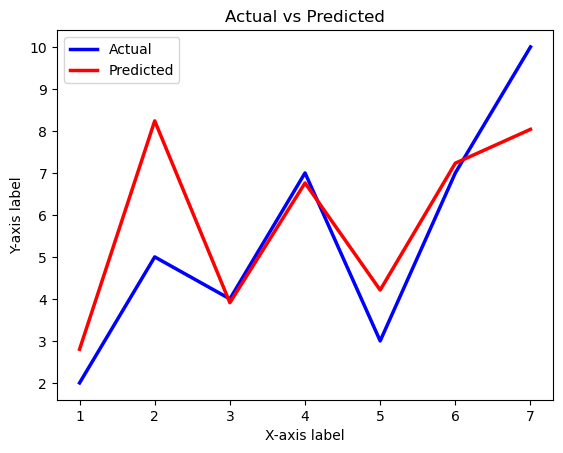

In [32]:
import matplotlib.pyplot as plt
c=[i for i in range(1,61,1)]

fig = plt.figure()

# Assuming c is the array you want to use as x-values
# Plot actual values
plt.plot(c[:len(y_test)], y_test, color='blue', linewidth=2.5, linestyle='-')

# Plot predicted values
plt.plot(c[:len(y_test)], y_pred, color='red', linewidth=2.5, linestyle='-')

plt.xlabel('X-axis label')  # Provide a meaningful x-axis label
plt.ylabel('Y-axis label')  # Provide a meaningful y-axis label
plt.title('Actual vs Predicted')  # Provide a meaningful title
plt.legend(['Actual', 'Predicted'])  # Add a legend

plt.show()



# Error Terms

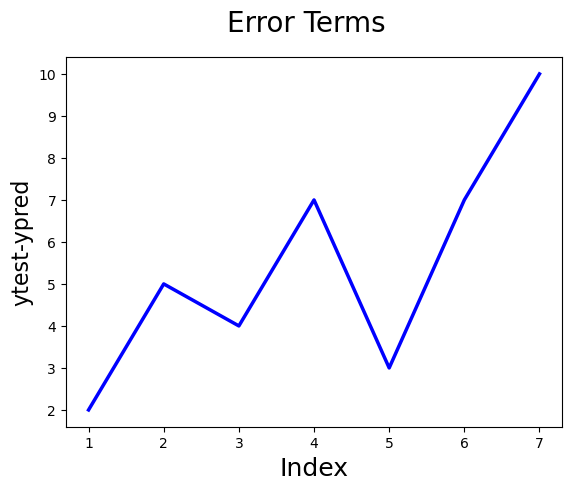

In [35]:
fig = plt.figure()
plt.plot(c[:len(y_test)], y_test, color='blue', linewidth=2.5, linestyle='-')
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel("ytest-ypred", fontsize=16)
plt.show()


# Evaluation for Regression

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

Model Performance

In [38]:
# Assuming you have y_test and y_pred already defined
y_mean = np.mean(y_test)

# Calculate SStot (total sum of squares)
SStot = np.sum((y_test - y_mean) ** 2)

# Calculate SSres (residual sum of squares)
SSres = np.sum((y_test - y_pred) ** 2)

# Calculate R-squared
r2 = 1 - (SSres / SStot)

print("R-squared:", r2)


R-squared: 0.6374799754601339


In [44]:
from sklearn import metrics 
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1.110925832695106
MSE: 2.3674777112807583
RMSE: 1.5386610124653053


# Seeing the best fit line


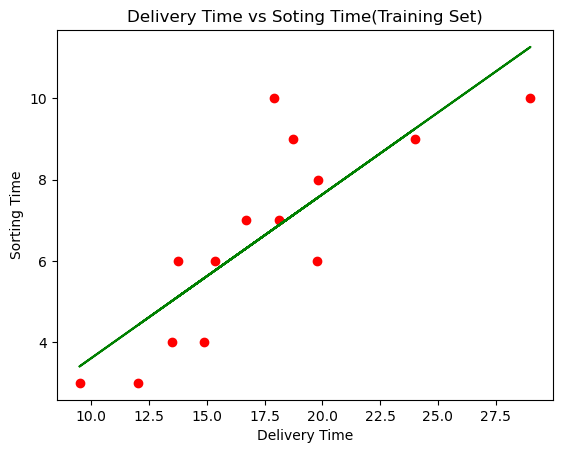

In [50]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train,color="red")
plt.plot(X_train,lr.predict(X_train),color="green")
plt.title("Delivery Time vs Soting Time(Training Set)")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.show()

Here are some specific insights that we can learn from this graph:

Sorting time has a significant impact on delivery time. The positive correlation between the two variables indicates that a longer sorting time typically results in a longer delivery time. This highlights the importance of optimizing sorting processes to minimize delays and improve overall fulfillment efficiency.

There is a range of delivery times for a given sorting time. While the overall trend shows a positive correlation between sorting and delivery times, the data points scatter around the trend line, indicating that there is some variation in delivery times for a given sorting time. This suggests that other factors, such as transportation efficiency, packaging time, and unforeseen events, can influence the final delivery time.

Identifying outliers can reveal areas for improvement. Outliers in the scatter plot, such as points that fall significantly below or above the trend line, could indicate outliers in sorting or delivery times. Investigating these outliers can help identify potential issues in the sorting or delivery processes that could be addressed to improve overall efficiency.

Developing a predictive model can enhance decision-making. Based on the observed relationship between sorting and delivery times, a predictive model can be developed to estimate delivery times for new products or orders based on their estimated sorting times. This can aid in production planning, inventory management, and customer service.

Optimizing sorting processes can reduce delivery delays. By identifying and addressing inefficiencies in sorting processes, such as bottlenecks in sorting lines or inefficient sorting techniques, businesses can potentially reduce sorting times and, consequently, delivery times. This can lead to improved customer satisfaction and increased competitiveness.

In summary, the provided graph provides valuable insights into the relationship between sorting time and delivery time. By understanding this correlation and identifying potential areas for improvement, businesses can optimize their fulfillment processes, reduce delivery delays, and enhance customer experience.

# 2) Salary_hike -> Build a prediction model for Salary_hike

In [51]:
import pandas as pd

In [62]:
salary_h=pd.read_csv("C:/Users/Admin/Downloads/Salary_Data.csv")

In [63]:
salary_h.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [64]:
salary_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [65]:
salary_h.shape

(30, 2)

In [66]:
salary_h.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

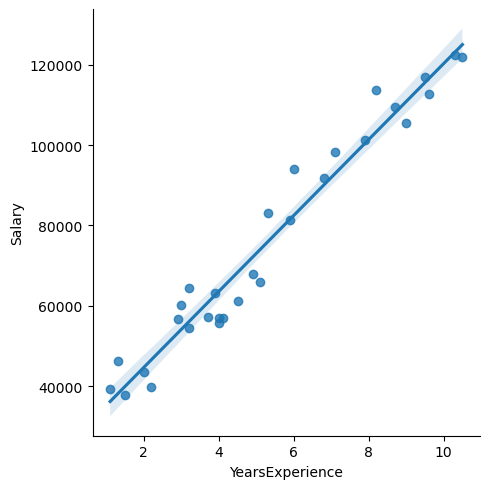

In [68]:
sns.lmplot(x="YearsExperience", y="Salary", data=salary_h);


There is a positive correlation between years of experience and salary, meaning that as years of experience increase, salary also tends to increase.

# Preparing x and y

In [70]:
# Putting feature value to X
X= salary_h['YearsExperience']
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [72]:
# Putting feature value to y
y= salary_h['Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

# Splitting the data into Training and Testing Sets

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [76]:
X_test[:5]

9      3.7
26     9.5
28    10.3
13     4.1
5      2.9
Name: YearsExperience, dtype: float64

In [77]:
y_test[:5]

9      57189.0
26    116969.0
28    122391.0
13     57081.0
5      56642.0
Name: Salary, dtype: float64

In [78]:
len(X_train)

21

In [79]:
len(y_test)

9

In [80]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21,)
(21,)
(9,)
(9,)


# Performing Linear Regression

In [82]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming X_train is a pandas Series
# Convert it to a NumPy array and reshape
X_train = X_train.values.reshape(-1, 1)

# Create a linear regression model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [83]:
# We will look at the coeffients that the model has choosen
print(lr.intercept_)
print(lr.coef_)

25202.887786154883
[9731.20383825]


For the coefficient (0.4028), it suggests that there is a positive relationship between "YearsExperience" and "Salary." As "YearsExperience" increases by one unit, the predicted "Salary" increases by approximately 9731.20 units.

Prediction

In [84]:
y_pred = lr.predict(X_test.values.reshape(-1, 1))

y_pred[:5]
y_test[:5]

9      57189.0
26    116969.0
28    122391.0
13     57081.0
5      56642.0
Name: Salary, dtype: float64

# Show Actual and Predicted value

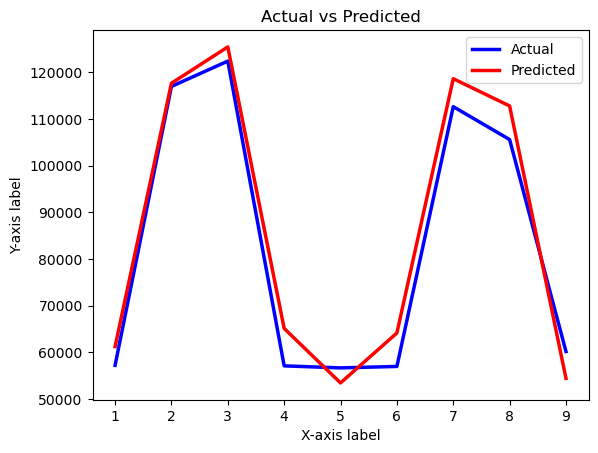

In [85]:
import matplotlib.pyplot as plt
c=[i for i in range(1,61,1)]

fig = plt.figure()

# Assuming c is the array you want to use as x-values
# Plot actual values
plt.plot(c[:len(y_test)], y_test, color='blue', linewidth=2.5, linestyle='-')

# Plot predicted values
plt.plot(c[:len(y_test)], y_pred, color='red', linewidth=2.5, linestyle='-')

plt.xlabel('X-axis label')  # Provide a meaningful x-axis label
plt.ylabel('Y-axis label')  # Provide a meaningful y-axis label
plt.title('Actual vs Predicted')  # Provide a meaningful title
plt.legend(['Actual', 'Predicted'])  # Add a legend

plt.show()


# Error Terms

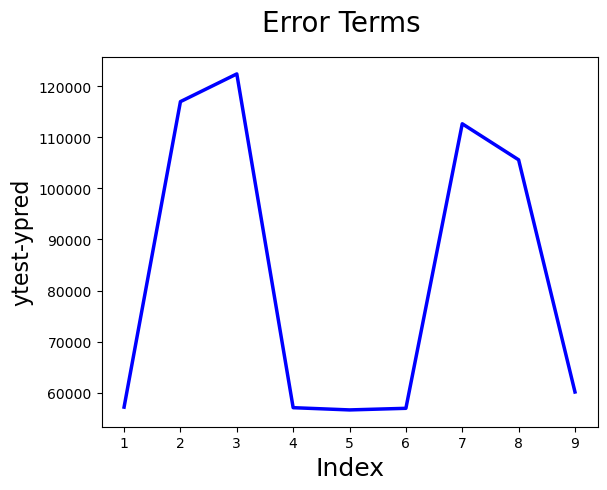

In [86]:
fig = plt.figure()
plt.plot(c[:len(y_test)], y_test, color='blue', linewidth=2.5, linestyle='-')
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel("ytest-ypred", fontsize=16)
plt.show()


# Evalution for Regression

In [87]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

30310299.043402452

# Model Performance

In [88]:
# Assuming you have y_test and y_pred already defined
y_mean = np.mean(y_test)

# Calculate SStot (total sum of squares)
SStot = np.sum((y_test - y_mean) ** 2)

# Calculate SSres (residual sum of squares)
SSres = np.sum((y_test - y_pred) ** 2)

# Calculate R-squared
r2 = 1 - (SSres / SStot)

print("R-squared:", r2)


R-squared: 0.9627668685473267


In [89]:
from sklearn import metrics 
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 5010.529885004953
MSE: 30310299.043402452
RMSE: 5505.479002176146


# Seeing the best fit line

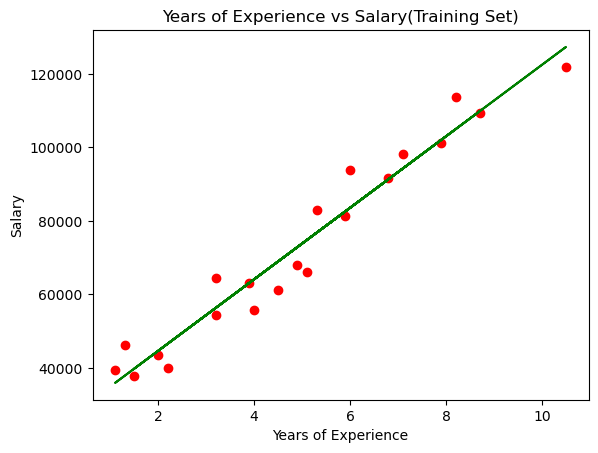

In [91]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train,color="red")
plt.plot(X_train,lr.predict(X_train),color="green")
plt.title("Years of Experience vs Salary(Training Set)")
plt.xlabel("ears of Experience")
plt.ylabel("Salary")
plt.show()



Insights:

The average salary for each year of experience is shown by the trendline. This means that, on average, employees with more experience earn a higher salary.
There is a significant amount of variation in salary for each year of experience. This is shown by the scatter of data points around the trendline. This variation may be due to a number of factors, such as industry, occupation, location, and skills.
There are a few outliers in the data. These are data points that fall far away from the trendline. These outliers may represent individuals with exceptional skills or experience, or they may be due to other factors such as industry or location.
Conclusion:

The scatter plot shows that years of experience is a significant factor in determining salary. However, other factors such as industry, location, and skills also play a role. It is important to note that the trendline does not imply causation. Just because there is a positive correlation between years of experience and salary does not mean that gaining more experience is the only way to increase your salary. There are many other factors that can also contribute to a higher salary.

Employees with less than 2 years of experience: The salaries for employees with less than 2 years of experience are relatively low. This is likely because these employees are still developing their skills and experience.

Employees with 2 to 5 years of experience: The salaries for employees with 2 to 5 years of experience show a significant increase from the salaries for employees with less than 2 years of experience. This is because these employees have gained more experience and are able to perform their jobs more effectively.

Employees with 5 to 10 years of experience: The salaries for employees with 5 to 10 years of experience continue to increase, but at a slower rate than the salaries for employees with 2 to 5 years of experience. This is likely because these employees have reached a certain level of experience and are no longer able to command as high of a salary increase.

Employees with 10 or more years of experience: The salaries for employees with 10 or more years of experience are the highest. This is because these employees have the most experience and are the most valuable to their employers.

